In [1]:
import pandas as pd
import numpy as np


from xgboost import XGBClassifier
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import precision_score, recall_score, auc,roc_curve, f1_score
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import SGDClassifier

In [2]:
from sklearn import preprocessing
train1 = pd.read_csv(r'E:\project\FINAL\features.csv')
le=preprocessing.LabelEncoder()
le.fit(train1['FinalGrade'])
train1['FinalGrade']=le.transform(train1['FinalGrade'])
y=train1['FinalGrade']
# train1 = train1.drop(labels=['Regularity','Grade1','Grade2'],axis=1)

train1 = pd.get_dummies(train1)
# y=train1.FinalGrade
train1 = train1.drop(labels=['G3','FinalGrade'],axis=1)
train1.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,Grade1_Excellent,Grade1_Failure,Grade1_Good,Grade1_Poor,Grade1_Satisfactory,Grade2_Excellent,Grade2_Failure,Grade2_Good,Grade2_Poor,Grade2_Satisfactory
0,18,4,4,2,2,0,4,3,4,1,...,0,1,0,0,0,0,0,0,1,0
1,17,1,1,1,2,0,5,3,3,1,...,0,1,0,0,0,0,1,0,0,0
2,15,1,1,1,2,3,4,3,2,2,...,0,0,0,1,0,0,0,0,1,0
3,15,4,2,1,3,0,3,2,2,1,...,0,0,1,0,0,0,0,0,0,1
4,16,3,3,1,2,0,4,3,2,1,...,0,0,0,1,0,0,0,0,1,0


In [3]:
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(train1,y,random_state=1,test_size=0.3)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(276, 73)
(276,)
(119, 73)
(119,)


In [4]:
#Defining learning classifiers

names = ["Nearest_Neighbors", "Linear_SVM", "Polynomial_SVM", "RBF_SVM", "Gaussian_Process",
         "Gradient_Boosting", "Decision_Tree", "Extra_Trees", "Random_Forest", "Neural_Net", "AdaBoost",
         "Naive_Bayes", "QDA", "SGD", "Logistic Regression", "XGBoost"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(kernel="poly", degree=3, C=0.025),
    SVC(kernel="rbf", C=1, gamma=2),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    GradientBoostingClassifier(n_estimators=100, learning_rate=1.0),
    DecisionTreeClassifier(max_depth=5),
    ExtraTreesClassifier(n_estimators=10, min_samples_split=2),
    RandomForestClassifier(max_depth=5, n_estimators=100),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(n_estimators=100),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
    SGDClassifier(loss="hinge", penalty="l2"),
    LogisticRegression(),
    XGBClassifier(learning_rate=0.1,n_estimators=100)]

In [9]:
from sklearn.metrics import average_precision_score
from sklearn.metrics import classification_report
model_cols = []
scores1 = []
scores2 = []
f1scores = []
recalls1 = []
precisions1 = []
#mf1scores = []
df=pd.DataFrame(columns=model_cols)
index=0

for name, clf in zip(names, classifiers):
    clf.fit(X_train,Y_train)
    df.loc[index,'Classifiers'] = name
    
    
    score11 = clf.score(X_train, Y_train)
    scores1.append(score11)
    
  
    score22 = clf.score(X_test, Y_test)
    scores2.append(score22)
    
    f1score1 = f1_score(Y_test,clf.predict(X_test), average="macro")
    f1scores.append(f1score1)
    
    report = classification_report(Y_test, clf.predict(X_test), output_dict=True)
    #macro_precision =  report['macro avg']['precision'] 
    #macro_recall = report['macro avg']['recall']    
    #macro_f1 = report['macro avg']['f1-score']
    
    recall11 = report['macro avg']['recall'] 
    recalls1.append(recall11)
    
    precision11 = report['macro avg']['precision'] 
    precisions1.append(precision11)
    
    #macrof11 = report['macro avg']['f1-score'] 
    #mf1scores.append(macrof11)
    
    

    df.loc[index,'Train Accuracy'] = clf.score(X_train,Y_train)
    df.loc[index,'Test Accuracy'] = clf.score(X_test,Y_test)
    #df.loc[index,'Precision'] = precision(X_test,clf.predict(X_test))
    #df.loc[index,'Recall'] = recall(Y_test,clf.predict(Y_test))
    df.loc[index,'F1 Score'] = f1_score(Y_test,clf.predict(X_test), average="macro")
    index+=1
    

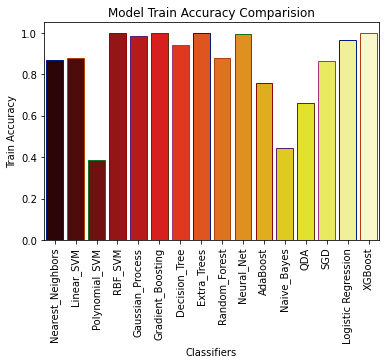

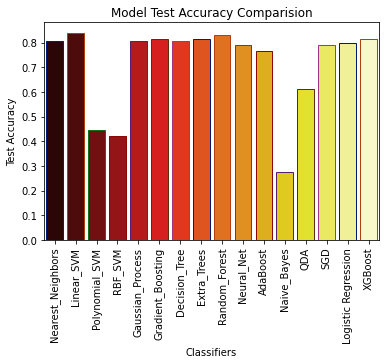

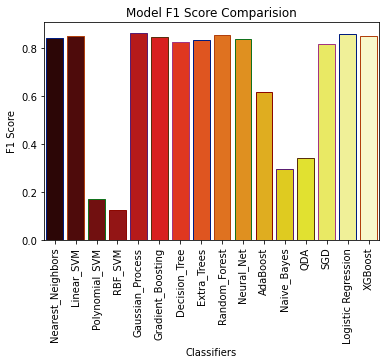

In [10]:
import seaborn as sns
sns.barplot(x='Classifiers',y='Train Accuracy', data=df, palette='hot',
            edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Model Train Accuracy Comparision')
plt.show()

import seaborn as sns
sns.barplot(x='Classifiers',y='Test Accuracy', data=df, palette='hot',
            edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Model Test Accuracy Comparision')
plt.show()


import seaborn as sns
sns.barplot(x='Classifiers',y='F1 Score', data=df, palette='hot',
            edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Model F1 Score Comparision')
plt.show()



In [11]:
import pandas as pd
import seaborn as sns
# Create data frame of model performance

df = pd.DataFrame()
df['name'] = names
df['Train accuracy'] = scores1
df['Test accuracy'] = scores2
df['f1 Score'] = f1scores
#df['macrof1 Score'] = mf1scores
df['recall'] = recalls1
df['precision'] = precisions1
df

,name,Train accuracy,Test accuracy,f1 Score,recall,precision
0,Nearest_Neighbors,0.869565,0.806723,0.841842,0.856190,0.832741
1,Linear_SVM,0.876812,0.840336,0.848821,0.824762,0.925121
2,Polynomial_SVM,0.384058,0.445378,0.170794,0.232653,0.200000
3,RBF_SVM,1.000000,0.420168,0.126061,0.204444,0.283051
4,Gaussian_Process,0.985507,0.806723,0.862807,0.871383,0.855985
5,Gradient_Boosting,1.000000,0.815126,0.845830,0.843628,0.852263
6,Decision_Tree,0.942029,0.806723,0.823971,0.840272,0.811412
7,Extra_Trees,1.000000,0.815126,0.831420,0.827347,0.875175
8,Random_Forest,0.876812,0.831933,0.854673,0.836236,0.890273
9,Neural_Net,0.996377,0.789916,0.837171,0.847302,0.832334


In [14]:
#Adding colors to the data frame


cm = sns.light_palette("red", as_cmap=True)
s = df.style.background_gradient(cmap=cm)
s

,name,Train accuracy,Test accuracy,f1 Score,recall,precision
0,Nearest_Neighbors,0.869565,0.806723,0.841842,0.856190,0.832741
1,Linear_SVM,0.876812,0.840336,0.848821,0.824762,0.925121
2,Polynomial_SVM,0.384058,0.445378,0.170794,0.232653,0.200000
3,RBF_SVM,1.000000,0.420168,0.126061,0.204444,0.283051
4,Gaussian_Process,0.985507,0.806723,0.862807,0.871383,0.855985
5,Gradient_Boosting,1.000000,0.815126,0.845830,0.843628,0.852263
6,Decision_Tree,0.942029,0.806723,0.823971,0.840272,0.811412
7,Extra_Trees,1.000000,0.815126,0.831420,0.827347,0.875175
8,Random_Forest,0.876812,0.831933,0.854673,0.836236,0.890273
9,Neural_Net,0.996377,0.789916,0.837171,0.847302,0.832334


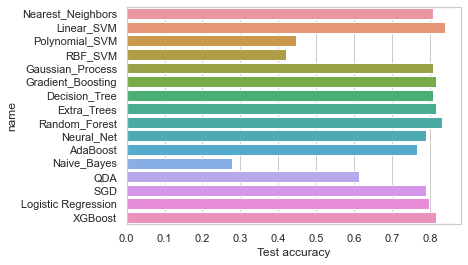

In [13]:
#Bar plot of model performance

sns.set(style="whitegrid")
ax = sns.barplot(y="name", x="Test accuracy", data=df)